## Image segmentation with CamVid

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
device=torch.cuda.current_device()

In [4]:
torch.cuda.get_device_properties(device)

_CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)

In [5]:
(torch.cuda.get_device_properties(device).total_memory)/ 1e9

17.071734784

In [3]:
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/camvid/images'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels'),
 PosixPath('/home/jupyter/.fastai/data/camvid/valid.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/codes.txt')]

In [4]:
path_label = path/'labels' # directory where the image labels are located
path_images = path/'images' # directory where the images are located

## Data

In [5]:
# the function get_image_files returns a list of file names in the directory that are images. 
fnames = get_image_files(path_images)
fnames[0:3]

[PosixPath('/home/jupyter/.fastai/data/camvid/images/0016E5_08009.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0016E5_08107.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0016E5_08190.png')]

In [6]:
len(fnames) # There are 701 images inside the directory path_images

701

In [7]:
label_names = get_image_files(path_label) # The labels for the images are also images
label_names[:3]

[PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_07987_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_07999_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_08155_P.png')]

In [8]:
len(label_names)

701

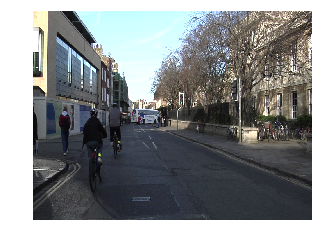

In [9]:
img_example = fnames[1]
img = open_image(img_example) # open_image returns an Image object created from one image in fnames.
img.show(figsize=(5,5))

In [10]:
type(img) # Image object as defined by the fastai vision library

fastai.vision.image.Image

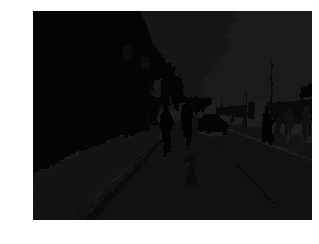

In [11]:
img_label_example = label_names[1] # as you can see the same index has different images
img2 = open_image(img_label_example)
img2.show(figsize=(5,5))

In [12]:
get_y_fn = lambda x: path_label/f'{x.stem}_P{x.suffix}' 
# This function takes an image filename and adds the "_P" to the end of it
# Then takes this new filename and opens it from path_label directory
# It's a convenient way to map the images to their corresponding  labels

In [13]:
# Example
fnames[1].stem, fnames[1].suffix

('0016E5_08107', '.png')

In [14]:
fnames[1]

PosixPath('/home/jupyter/.fastai/data/camvid/images/0016E5_08107.png')

In [15]:
get_y_fn(fnames[1]) # As you can see, the _P was added at the end. This is how the images are labeled.
# Each pixel in the labeled image represents a color in the original image.

PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_08107_P.png')

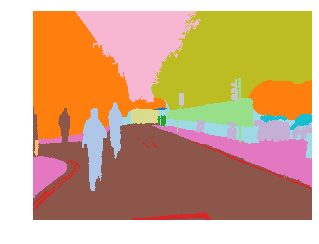

In [16]:
# open_mask returns an ImageSegment object created from an applied mask to the labeled image
segmented_image = open_mask(get_y_fn(img_example)) # open_mask returns integers; open_images returns floats
segmented_image.show(figsize=(5,5), alpha=1) # fastai knows how to deal with masks. It will automatically color code it for you

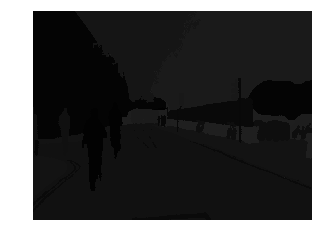

In [17]:
#Same image but in black and white when we apply open_image to the labeled image
mask1 = open_image(get_y_fn(img_example)) # we use the img_example defined above and use the lambda function to get
mask1.show(figsize=(5,5), alpha=1) # the corresponding labeled image

In [20]:
type(segmented_image) # "segmented_image" is now an image segment object

fastai.vision.image.ImageSegment

In [18]:
src_size = np.array(segmented_image.shape[1:])
src_size, segmented_image.data
# the segmented image or labeled image is 720 x 960 image and a tensor of integers

(array([720, 960]), tensor([[[ 4,  4,  4,  ..., 26, 26, 26],
          [ 4,  4,  4,  ..., 26, 26, 26],
          [ 4,  4,  4,  ..., 26, 26, 26],
          ...,
          [17, 17, 17,  ..., 17, 17, 17],
          [17, 17, 17,  ..., 17, 17, 17],
          [17, 17, 17,  ..., 17, 17, 17]]]))

In [37]:
img.data # The original image is a tensor of floats

tensor([[[1.0000, 1.0000, 0.5647,  ..., 0.3922, 0.2784, 0.3961],
         [0.7725, 0.4118, 0.2784,  ..., 0.2784, 0.3686, 0.6863],
         [0.2902, 0.4039, 0.7569,  ..., 0.5647, 0.5843, 0.5961],
         ...,
         [0.1490, 0.1373, 0.1373,  ..., 0.1647, 0.1647, 0.1647],
         [0.1294, 0.1176, 0.1216,  ..., 0.1569, 0.1569, 0.1569],
         [0.1333, 0.1216, 0.1216,  ..., 0.1647, 0.1647, 0.1647]],

        [[1.0000, 0.8588, 0.4157,  ..., 0.3569, 0.2353, 0.3529],
         [0.6275, 0.2667, 0.1294,  ..., 0.2431, 0.3294, 0.6471],
         [0.1490, 0.2627, 0.6196,  ..., 0.5216, 0.5451, 0.5569],
         ...,
         [0.1529, 0.1412, 0.1412,  ..., 0.1765, 0.1765, 0.1765],
         [0.1451, 0.1333, 0.1373,  ..., 0.1765, 0.1686, 0.1686],
         [0.1490, 0.1373, 0.1373,  ..., 0.1843, 0.1843, 0.1843]],

        [[0.8588, 0.7059, 0.2980,  ..., 0.3686, 0.2353, 0.3529],
         [0.4902, 0.1294, 0.0118,  ..., 0.2471, 0.3176, 0.6353],
         [0.0471, 0.1608, 0.4980,  ..., 0.5216, 0.5333, 0.

In [19]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes # The file codes.txt contains the codes for the integers above
# The index 26 (top right) is a tree and 4 (top left) is a building
# Bottom left 17 is a road and bottom right 17 is also a road
# This is a code for what each pixel represents.  Every integer is a color code.

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

## Datasets

In [23]:
size = src_size//2 # Size of the image in the dataset. // division rounds to the nearest integer
# You can try other image sizes as well
bs=8 # we're creating a classifier for every pixel so it's going to take a lot of GPU

In [24]:
data = (SegmentationItemList.from_folder(path_images)
        .split_by_fname_file('../valid.txt')
        # we received a list of filenames that should be in your validation set
        # this is because the images are frames of a video and they wanted to mix up the frames
        # they are non-contiguous part of the video
        .label_from_func(get_y_fn, classes=codes) # the function contains the "labels" path
        # codes is the list of class names defined above
        .transform(get_transforms(), tfm_y=True, size=size) 
        # tfm_y=True --> we want to transform the labels too so they macth the images when we apply transforms to the
        # independet variables. Whatever you do to the X, you must also do to the y in this case
        .databunch(bs=bs)
        .normalize(imagenet_stats))

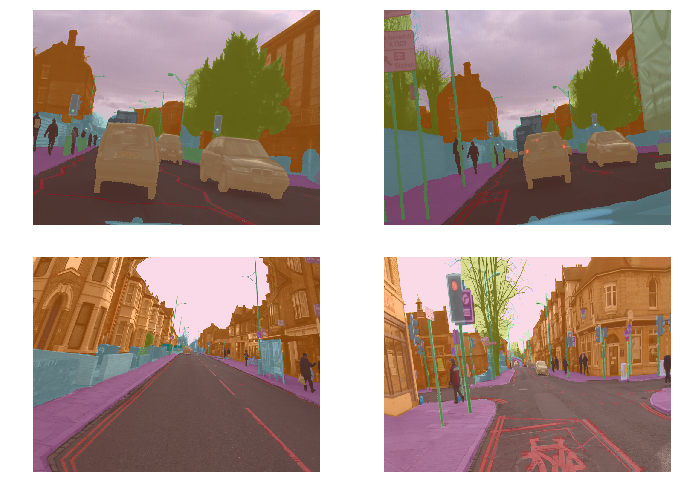

In [45]:
data.show_batch(2, figsize=(10,7)) #it automatically color codes the pictures since you defined it as a segmentation dataset.
# These are the orginial images color coded according to their segmentation labels

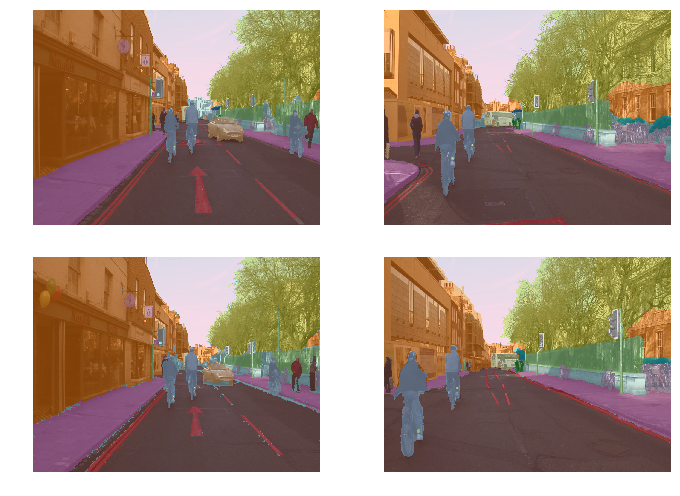

In [46]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

## Model

In [20]:
# You can just use accuracy for metrics, but in this dataset there is a pixel labeled as void
# So we are removing all the pixels named void
name2id = {v:k for k,v in enumerate(codes)} #it's a dictionary listing value: index for the codes.txt file
void_code = name2id['Void']

In [48]:
name2id

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'SUVPickupTruck': 22,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [21]:
name2id['Void'] # void_code

30

In [22]:
# This function is the metric that will be used to gauge the model 
def acc_camvid(input, target): # input is our predictions and target is the labels we're trying to predict
    target = target.squeeze(1) # returns a tensor with all the dimensions of '1' 
    # When dim is given, a squeeze operation is done only in the given dimension. If input is of shape: (A×1×B)
    # squeeze(input, 0) leaves the tensor unchanged, but squeeze(input, 1) will squeeze the tensor to the shape(A×B)
    mask = target != void_code # mask is all the places where target is not equal to 'Void'
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()
# argmax takes a tensor and returns the index of its maximum value. dim=0 is along the rows, dim=1 is along the columns. 
# in this case that tensor is a vector of probabilities. So it's given you the index where the maximum probability is
# This index is actually the class ID. You compare that with the target[mask], which is the actual class ID
# we look how often the input = the target and then take the average
# this the same as the accuracy source code we've seen before, but we the addition of the "mask" part.

In [23]:
metrics = acc_camvid
wd=1e-2 # weight decay

In [29]:
# For segmentation we call an architecture called U-Net, which is a CNN that is useful for segmentation
learn = unet_learner(data, models.resnet34, wd=wd, metrics=metrics).to_fp16() # puts the model in FP16 precision mode

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


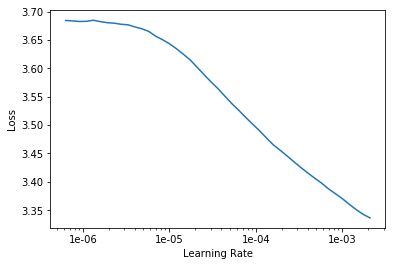

In [30]:
lr_find(learn)
learn.recorder.plot()

In [31]:
lr=1e-3

In [32]:
learn.fit_one_cycle(5, slice(lr)) #fit_one_cycle makes the learning rate start slow, then go up, then go back down again

epoch,train_loss,valid_loss,acc_camvid
1,2.912349,2.784535,0.627940
2,2.621915,2.448773,0.759045
3,2.348784,2.211305,0.826729
4,2.162988,2.079280,0.868029
5,2.066295,2.038371,0.862075


In [33]:
learn.save('camvid-stage-1')

In [34]:
learn.load('camvid-stage-1');

In [35]:
# The first saved model was trained with the first layers unfrozen, since the weights were already pre-trained. 
# Now we train it again but with all the layer unfrozen
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


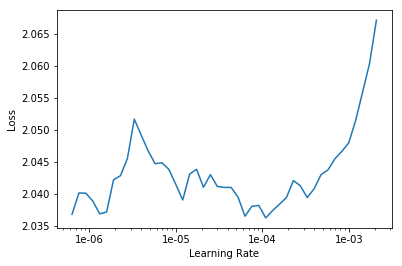

In [36]:
lr_find(learn)
learn.recorder.plot()

In [37]:
lrs = slice(1e-5, lr/5)

In [38]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid
1,2.031827,2.043957,0.857585
2,2.017852,2.030546,0.864906
3,1.983451,1.933210,0.869528
4,1.931551,1.944038,0.866336
5,1.874998,1.876565,0.870998
6,1.828665,1.817683,0.881701
7,1.786986,1.806971,0.882310
8,1.759373,1.780499,0.882315
9,1.738653,1.762347,0.884880
10,1.732270,1.765934,0.882810


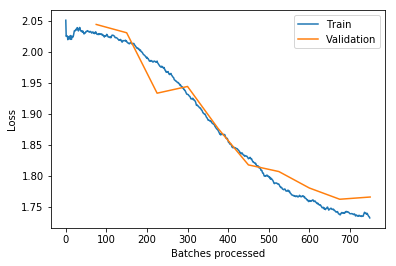

In [39]:
learn.recorder.plot_losses() 

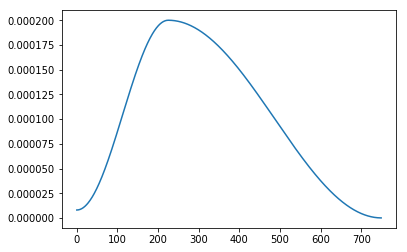

In [40]:
learn.recorder.plot_lr() # Plot of learning rate over time
# You want the learning to increase at the start so that it gets over the loss function "bumps", but then 
# as it gets closer to the ground truth answer, you want to learning rate to get smaller

In [41]:
learn.save('camvid-stage-2');

## Go big

You may have to restart your kernel and come back to this stage if you run out of memory, and may also need to decrease `bs`.

In [24]:
# Clear memory
learn=None
gc.collect()

8060

In [25]:
size = src_size # Now we use the full size of the images
bs=4

In [26]:
data = (SegmentationItemList.from_folder(path_images)
        .split_by_fname_file('../valid.txt')
        .label_from_func(get_y_fn, classes=codes)
        .transform(get_transforms(), tfm_y=True, size=size)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [27]:
learn = unet_learner(data, models.resnet34, metrics=metrics).to_fp16()

In [50]:
learn.load('camvid-stage-2');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


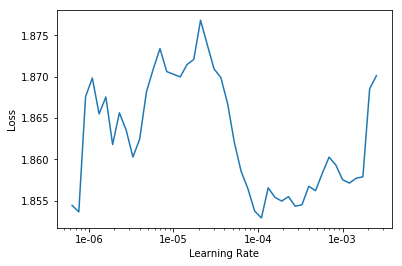

In [51]:
lr_find(learn)
learn.recorder.plot()

In [52]:
lr=1e-3

In [54]:
learn.fit_one_cycle(5, slice(lr)) # smaller batch sizes take a longer time to train per epoch

epoch,train_loss,valid_loss,acc_camvid
1,1.786776,1.772077,0.875293
2,1.749532,1.709432,0.884771
3,1.698867,1.676375,0.900150
4,1.663043,1.616050,0.896012
5,1.653654,1.635018,0.899415


In [55]:
learn.save('stage-1-big')

In [56]:
learn.load('stage-1-big');

In [57]:
learn.unfreeze()

In [37]:
lrs = slice(lr/1000,lr/10)

In [58]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid
1,1.646864,1.563250,0.908482
2,1.638179,1.586103,0.904140
3,1.584127,1.510909,0.904959
4,1.494655,1.433938,0.918936
5,1.423259,1.348547,0.912317
6,1.348580,1.296748,0.910041
7,1.304357,1.303440,0.914009
8,1.271081,1.231188,0.920921
9,1.250102,1.224799,0.923816
10,1.244599,1.227750,0.924028


In [59]:
learn.save('stage-2-big')

In [28]:
learn.load('stage-2-big');

In [29]:
learn.model.float();

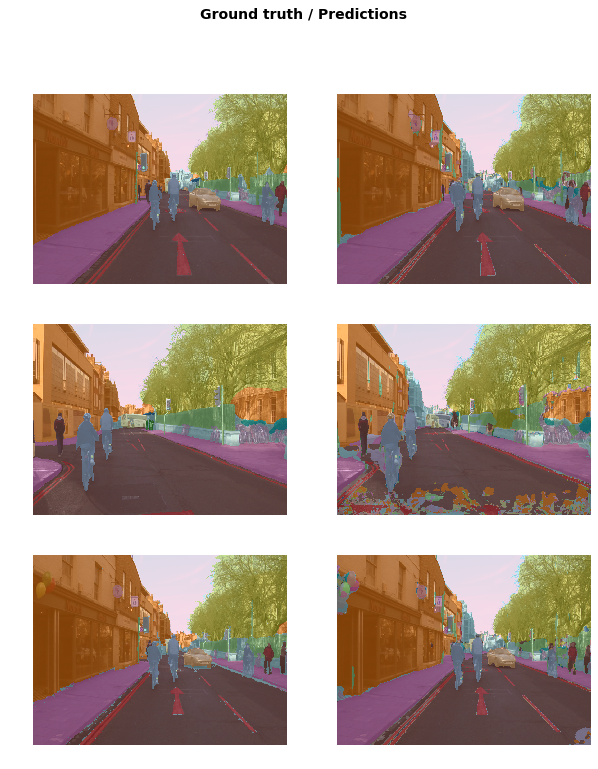

In [30]:
learn.show_results(rows=3, figsize=(10,12))

We can see the results for the final above. Most of the pixels in the prediction images are the same color as the pixels in the ground truth images.